## 농어 무게 예측 (회귀)

In [2]:
import numpy as np

In [4]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [10]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [12]:
train_input.shape

(42, 1)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knr = KNeighborsRegressor(n_neighbors = 3)

In [30]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [32]:
# 길이가 50cm인 농어의 무게 예측
knr.predict([[50]])

array([1033.33333333])

In [38]:
import matplotlib.pyplot as plt

In [40]:
# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

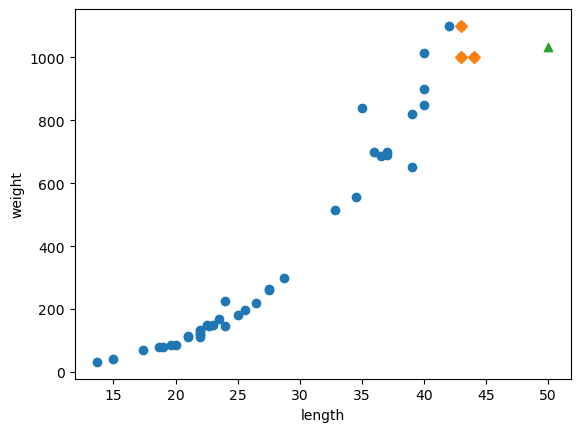

In [44]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D') # 50cm 농어의 이웃 데이터
plt.scatter(50, 1033, marker = '^') # 50cm 농어의 무게 예측값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [46]:
# k-means이므로 가까운 이웃 값을 바탕(평균)으로 새로운 값을 예측
# 따라서, 새로운 샘플리 훈련 데이터의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다.
# 100cm의 농어여도 무게를 1033g으로 예측

knr.predict([[100]])

array([1033.33333333])

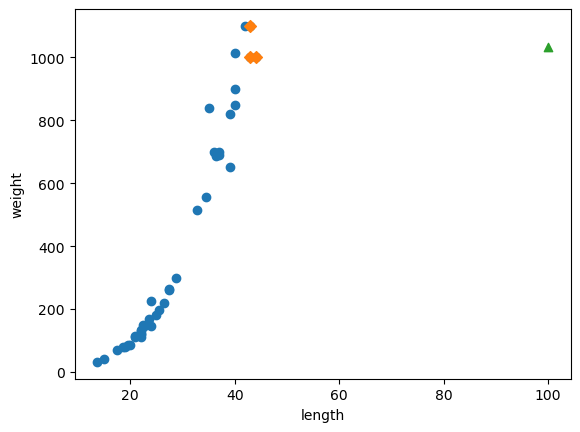

In [48]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D') # 100cm 농어의 이웃 데이터
plt.scatter(100, 1033, marker = '^') # 100cm 농어의 무게 예측값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀 알고리즘으로 예측하기

In [51]:
# 데이터를 잘 표현하는 직선 찾기

In [53]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [59]:
lr.fit(train_input, train_target)

LinearRegression()

In [61]:
lr.predict([[50]])

array([1241.83860323])

In [69]:
print(lr.coef_, lr.intercept_) # 선형 회귀 계수와 기울기

[39.01714496] -709.0186449535477


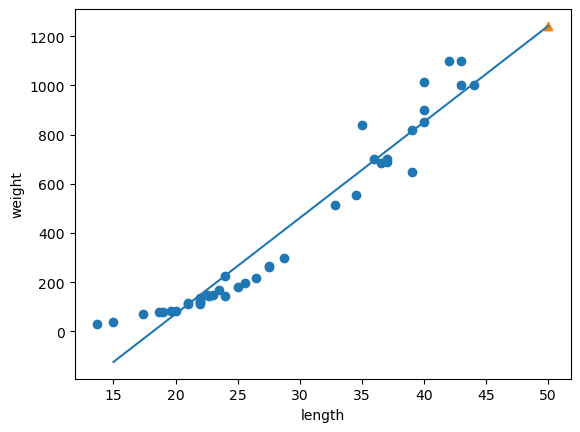

In [71]:
plt.scatter(train_input, train_target)

# 길이 15에서 50까지의 농어의 1차 방정식 그래프 그리기
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [73]:
lr.score(train_input, train_target)

0.939846333997604

In [75]:
lr.score(test_input, test_target)

0.8247503123313558

In [77]:
# 최적의 직선 찾기 -> 최적의 곡선 찾기 (다항회귀)
# 모델이 더 복잡해서 학습이 잘 됌 (과소적합 벗어나기)

In [79]:
# 2차 방정식을 만들기 위해, 농어의 길이를 제곱한 데이터와 농어의 길이 데이터 합치기
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [85]:
train_poly.shape

(42, 2)

In [87]:
lr = LinearRegression()

In [89]:
lr.fit(train_poly, train_target)

LinearRegression()

In [93]:
lr.predict([[50**2, 50]]) # input이 2개가 들어가야함

array([1573.98423528])

In [95]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


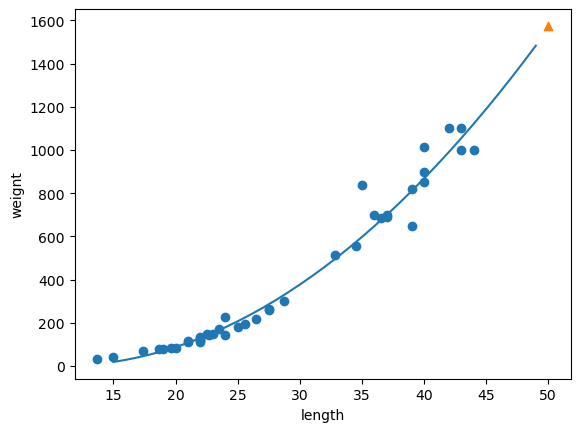

In [103]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) # 15에서 49까지의 2차 방정식 그래프
plt.scatter(50, 1574, marker = '^') # 50cm 농어
plt.xlabel('length')
plt.ylabel('weignt')
plt.show()

In [105]:
lr.score(train_poly, train_target)

0.9706807451768623

In [107]:
lr.score(test_poly, test_target)

0.9775935108325121

In [109]:
# train 세트보다 test 세트의 점수가 더 높기 때문에 과소적합 -> 더 복잡한 모델 필요